<a href="https://colab.research.google.com/github/cjayjonathan/Data-Types-Data-Wrangling_Homeye/blob/main/Data_Types_%26_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types & Data Wrangling
-Working with different types of data: text files, CSV, JSON objects, HTML and databases

The pandas library is vast enough to read data from and save to several file formats such as CSV, JSON, HTML and even databases. 

In [ ]:
csv_df = pd.read_csv('sample_file.csv')
csv_df.to_csv('sample_file.csv', index=False)

# Sometimes dependent on the xlrd library which can be installed by running pip install xlrd in the terminal

excel_df = pd.read_excel('sample_file.xlsx')
excel_df.to_excel('sample_file.xlsx')

# Read table from a webpage and save as a dataframe

html_df = pd.read_html('http://wwww.webpage.com/sampledata.html')
html_df.to_html('sample_file.html')

FileNotFoundError: ignored

Pandas can connect to databases, get data with queries, and save in a dataframe. 

In the later part of this section, we will use this fuel dataset to perform some data wrangling operations which can be found in the example notebook for this module. In our notebook, after reading the csv file, we proceed to get a summary of the dataset using the describe function.

In [ ]:
import pandas as pd
url = 'https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data=pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


Our analysis shows that there are 180 missing values in the fuel data column. We handle this by filling with the most common value in the column - mcf. 

In [ ]:
# Check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

A dataframe can be easily categorised into different segments based on a given criteria using the groupby() function. This initially splits the dataframe into the groups then applies a function to the groups after which the results are combined.

In [ ]:
# Use groupby to count the sum of each unique value in the fuel unit column

fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [ ]:
# Check if the missing values have been filled

fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
fuel_data.groupby('report_year')['report_year'].count()
# Group by the fuel type code year and print the first entries in all the groups formed

fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


Merging in Pandas can be likened to join operations in relational databases like SQL. Left, inner, right and outer are the merging methods available to the merge() function. The left method can be likened to SQL left outer join,  inner to  SQL inner join, right to SQL right outer join and outer to SQL full outer join. In our analysis, we split the fuel data into two groups and merge using different methods.

In [ ]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

# Check that the length of both dfs sum to the expected length

assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2)) 

In [ ]:
# An inner merge will lose rows that do not match in both dfs

pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [ ]:
# Outer merge returns all rows in both dfs

pd.merge(fuel_df1, fuel_df2, how="outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
# Removes rows from the right dataframe that do not have a match with the left and keeps all rows from the left

pd.merge(fuel_df1, fuel_df2, how="left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


Concatenation is performed with the concat() function by combining series or dataframes while keeping the indices of the individual unit irrespective of duplicate indices. In the notebook, we created a dummy dataframe data_to_concat which we concatenated to the fuel_data as below:



In [ ]:
pd.concat([fuel_data, data_to_concat]).reset_index(drop=True)

NameError: ignored

Duplicates are a common occurrence in datasets which alter the results of data analysis. Hence, in practice, removing duplicate values is very important. The duplicated() function is used in Pandas to check for and handle duplicates.

In [ ]:
fuel_data.duplicated().any()

False

### **Data Visualization and Representation in Python**

Assuming we have collected data on energy consumption across different states in a  country, and how much people earn in these states; calculating some summary statistics can give quick insights to which state consumes the most energy; how much energy is used on average in the country, the correlation between people’s earnings, and energy consumed in their states and many others. It is essential to note that while these statistics are important and give a description of the dataset, it is not sufficient to use the results alone without plotting the data to obtain a holistic view of the overall distribution. Anscombe Quartet identifies that different datasets can have the same or very identical statistical properties such that they can be labelled the same, but when graphed, they are seen to have different distributions. 

Plotting: Area plots, Histograms, Bar charts, Pie Charts and Scatter Charts

There are several types of charts used in data visualisation which are selected based on the data and the information aimed to be communicated. Area plots, histograms, bar charts, pie charts, and scatter charts are some of the simple and common graphs used in data analysis. Graphs assist in understanding data when performing EDA and in conveying insights easily.  A line graph is a basic plot that displays the relationship between two variables on each axis by connecting data points together with straight lines. To show magnitude, the segment between the line and the x-axis is filled which results in an area graph. Histograms and bar charts are completely different plots that can be mistaken as similar. The former are charts used to represent the distribution of a group and use adjacent rectangular bars to display the frequency of intervals while the latter are charts that represent categories using equally spaced rectangular bars. 



Text(0.5, 0, 'Fuel Unit')

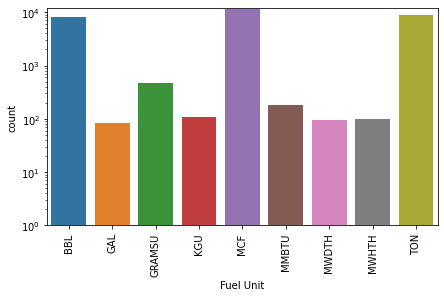

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')


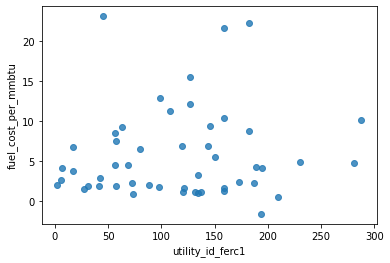

In [ ]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"],
fit_reg=False)


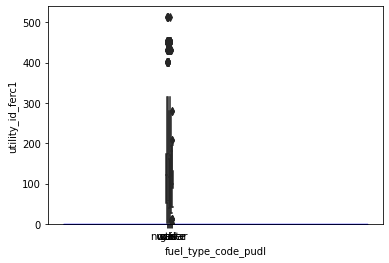

In [ ]:
# Import plotting library
import seaborn as sns
# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
palette=["m", "g"], data=fuel_data)
# KDE plot
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")